# Study of US Visitors 
### Data Engineering Capstone Project

#### Project Summary
--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [1]:
# Do all imports and installs here
import pandas as pd
import seaborn as sns

In [11]:
# Utilities
def check_NaN_Values_DF(df,cnames):
    
    print("%22s %6s %8s" % ('Column Name','Count','Percentage'))
    for c in cnames:
        c_sum = df[c].isnull().sum()
        c_percentage = 100.0*c_sum/len(df)
        print("%22s %6d %8.2f" % (c,c_sum,c_percentage))
    print("Number of total records is %d.\n" % len(df))    


### Step 1: Scope the Project and Gather Data

#### Scope 
Explain what you plan to do in the project in more detail. What data do you use? What is your end solution look like? What tools did you use? etc>

#### Describe and Gather Data 
Describe the data sets you're using. Where did it come from? What type of information is included? 

#### Immigration Data Set [1]

In [37]:
# Read in the data here
df = pd.read_csv('immigration_data_sample.csv')

In [38]:
df.head()

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,2027561,4084316.0,2016.0,4.0,209.0,209.0,HHW,20566.0,1.0,HI,...,NaN,M,1955.0,07202016,F,NaN,JL,5.658267e+10,00782,WT
1,2171295,4422636.0,2016.0,4.0,582.0,582.0,MCA,20567.0,1.0,TX,...,NaN,M,1990.0,10222016,M,NaN,*GA,9.436200e+10,XBLNG,B2
2,589494,1195600.0,2016.0,4.0,148.0,112.0,OGG,20551.0,1.0,FL,...,NaN,M,1940.0,07052016,M,NaN,LH,5.578047e+10,00464,WT
3,2631158,5291768.0,2016.0,4.0,297.0,297.0,LOS,20572.0,1.0,CA,...,NaN,M,1991.0,10272016,M,NaN,QR,9.478970e+10,00739,B2
4,3032257,985523.0,2016.0,4.0,111.0,111.0,CHM,20550.0,3.0,NY,...,NaN,M,1997.0,07042016,F,NaN,NaN,4.232257e+10,LAND,WT


In [40]:
df = df.astype({'i94yr': 'int32','i94mon': 'int32','i94mode': 'int32','biryear': 'int32','i94cit': 'int32','i94res': 'int32','cicid': 'int64','i94visa': 'int32','i94bir': 'int32','admnum': 'int64' })
df.head()

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,2027561,4084316,2016,4,209,209,HHW,20566.0,1,HI,...,NaN,M,1955,07202016,F,NaN,JL,56582674633,00782,WT
1,2171295,4422636,2016,4,582,582,MCA,20567.0,1,TX,...,NaN,M,1990,10222016,M,NaN,*GA,94361995930,XBLNG,B2
2,589494,1195600,2016,4,148,112,OGG,20551.0,1,FL,...,NaN,M,1940,07052016,M,NaN,LH,55780468433,00464,WT
3,2631158,5291768,2016,4,297,297,LOS,20572.0,1,CA,...,NaN,M,1991,10272016,M,NaN,QR,94789696030,00739,B2
4,3032257,985523,2016,4,111,111,CHM,20550.0,3,NY,...,NaN,M,1997,07042016,F,NaN,NaN,42322572633,LAND,WT


Let's look at column names.

In [34]:
df.columns

Index(['Unnamed: 0', 'cicid', 'i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port',
       'arrdate', 'i94mode', 'i94addr', 'depdate', 'i94bir', 'i94visa',
       'count', 'dtadfile', 'entdepa', 'entdepd', 'matflag', 'biryear',
       'dtaddto', 'gender', 'airline', 'admnum', 'fltno', 'visatype'],
      dtype='object')

Let's check the columns with NaN value

In [41]:
print("%22s %6s %8s" % ('Column','NaN','%'))
for c in df.columns:
    c_sum = df[c].isnull().sum()
    c_percentage = 100.0*c_sum/len(df)
    print("%22s %6d %8.2f" % (c,c_sum,c_percentage))

                Column    NaN        %
            Unnamed: 0      0     0.00
                 cicid      0     0.00
                 i94yr      0     0.00
                i94mon      0     0.00
                i94cit      0     0.00
                i94res      0     0.00
               i94port      0     0.00
               arrdate      0     0.00
               i94mode      0     0.00
               i94addr     59     5.90
               depdate     49     4.90
                i94bir      0     0.00
               i94visa      0     0.00
                 count      0     0.00
              dtadfile      0     0.00
              visapost    618    61.80
                 occup    996    99.60
               entdepa      0     0.00
               entdepd     46     4.60
               entdepu   1000   100.00
               matflag     46     4.60
               biryear      0     0.00
               dtaddto      0     0.00
                gender    141    14.10
                insnum   

The following columns can be dropped;
 - entdepu (100.0%)
 - occup    (99.6%)
 - insnum   (96.5%)
 - visapost (61.8%)

Drop a rows that has NaN value for any of the following columns;
 - fltno
 - airline
 - matflag
 - entdepd
 - i94addr
 - depdate
 - gender

In [42]:
df = df.drop(columns=['entdepu','occup','insnum','visapost'])
df.head()

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,...,entdepa,entdepd,matflag,biryear,dtaddto,gender,airline,admnum,fltno,visatype
0,2027561,4084316,2016,4,209,209,HHW,20566.0,1,HI,...,G,O,M,1955,07202016,F,JL,56582674633,00782,WT
1,2171295,4422636,2016,4,582,582,MCA,20567.0,1,TX,...,G,R,M,1990,10222016,M,*GA,94361995930,XBLNG,B2
2,589494,1195600,2016,4,148,112,OGG,20551.0,1,FL,...,G,O,M,1940,07052016,M,LH,55780468433,00464,WT
3,2631158,5291768,2016,4,297,297,LOS,20572.0,1,CA,...,G,O,M,1991,10272016,M,QR,94789696030,00739,B2
4,3032257,985523,2016,4,111,111,CHM,20550.0,3,NY,...,Z,K,M,1997,07042016,F,NaN,42322572633,LAND,WT


In [43]:
df = df.dropna()
df.head()

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,...,entdepa,entdepd,matflag,biryear,dtaddto,gender,airline,admnum,fltno,visatype
0,2027561,4084316,2016,4,209,209,HHW,20566.0,1,HI,...,G,O,M,1955,07202016,F,JL,56582674633,00782,WT
1,2171295,4422636,2016,4,582,582,MCA,20567.0,1,TX,...,G,R,M,1990,10222016,M,*GA,94361995930,XBLNG,B2
2,589494,1195600,2016,4,148,112,OGG,20551.0,1,FL,...,G,O,M,1940,07052016,M,LH,55780468433,00464,WT
3,2631158,5291768,2016,4,297,297,LOS,20572.0,1,CA,...,G,O,M,1991,10272016,M,QR,94789696030,00739,B2
5,721257,1481650,2016,4,577,577,ATL,20552.0,1,GA,...,T,N,M,1965,10072016,M,DL,736852585,910,B2


In [44]:
print("%22s %6s %8s" % ('Column Name','NaN','Percentage'))
for c in df.columns:
    c_sum = df[c].isnull().sum()
    c_percentage = 100.0*c_sum/len(df)
    print("%22s %6d %8.2f" % (c,c_sum,c_percentage))

                Column    NaN        %
            Unnamed: 0      0     0.00
                 cicid      0     0.00
                 i94yr      0     0.00
                i94mon      0     0.00
                i94cit      0     0.00
                i94res      0     0.00
               i94port      0     0.00
               arrdate      0     0.00
               i94mode      0     0.00
               i94addr      0     0.00
               depdate      0     0.00
                i94bir      0     0.00
               i94visa      0     0.00
                 count      0     0.00
              dtadfile      0     0.00
               entdepa      0     0.00
               entdepd      0     0.00
               matflag      0     0.00
               biryear      0     0.00
               dtaddto      0     0.00
                gender      0     0.00
               airline      0     0.00
                admnum      0     0.00
                 fltno      0     0.00
              visatype   

In [55]:
df['i94cit'].unique()

array([209, 582, 148, 297, 577, 245, 113, 438, 260, 512, 746, 111, 251,
       268, 213, 135, 133, 373, 126, 252, 689, 687, 129, 528, 123, 691,
       107, 103, 130, 694, 368, 575, 254, 116, 514, 273, 692, 117, 131,
       579, 164, 263, 124, 602, 121, 162, 274, 464, 690, 207, 696, 104,
       525, 105, 574, 576, 585, 272, 108, 114, 526, 603, 513, 516, 218,
       332, 204, 140, 296, 258, 201, 257, 520, 718, 261, 586, 115, 299,
       343, 688, 141, 350, 340, 734])

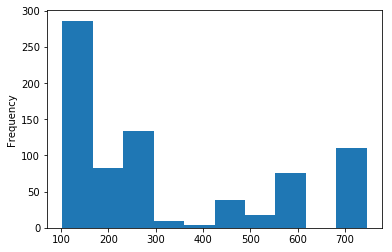

In [56]:
df['i94cit'].plot.hist()

In [57]:
df['i94res'].unique()

array([209, 582, 112, 297, 577, 245, 135, 438, 260, 512, 158, 511, 251,
       268, 213, 264, 509, 324, 689, 687, 129, 528, 123, 691, 107, 103,
       130, 694, 368, 575, 276, 116, 514, 124, 273, 692, 117, 131, 579,
       164, 126, 111, 263, 602, 121, 162, 274, 690, 207, 696, 104, 525,
       105, 518, 576, 585, 272, 108, 127, 526, 603, 513, 516, 218, 296,
       204, 464, 140, 258, 201, 114, 257, 520, 206, 243, 261, 586, 115,
       299, 343, 688, 141, 350, 332, 340, 120])

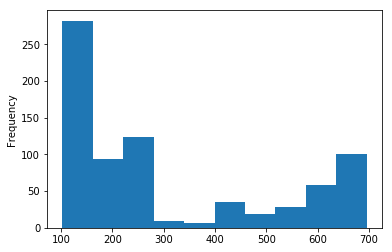

In [58]:
df['i94res'].plot.hist()

In [45]:
df['i94mode'].unique()

array([1, 2])

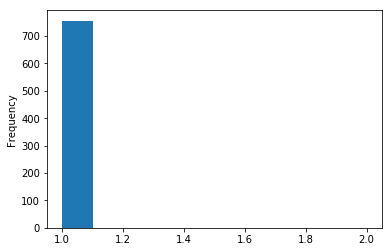

In [46]:
df['i94mode'].plot.hist()

In [59]:
df['entdepa'].unique()

array(['G', 'T', 'A', 'K', 'U', 'H', 'P'], dtype=object)

In [61]:
#df['entdepa'].plot.hist()

In [62]:
df['entdepd'].unique()

array(['O', 'R', 'N', 'K', 'D', 'I', 'Q', 'J', 'L'], dtype=object)

In [47]:
df['visatype'].unique()

array(['WT', 'B2', 'B1', 'GMT', 'WB', 'F1', 'E2', 'CP'], dtype=object)

In [49]:
df[['admnum','visatype']].groupby('visatype').count() 

,admnum
visatype,
B1,54
B2,288
CP,1
E2,3
F1,7
GMT,18
WB,54
WT,332


Values of visatype (2)
 - B-1 : Visa Holders-Business
 - B-2 : Visa Holders-Pleasure
 - E-1 : Visa Holders-Treaty Trader
 - E-2 : Visa Holders-Treaty Investor
 - F-1 : Visa Holders-Students
 - F-2 : Visa Holders-Family Members of Students
 - GMB : Guam Visa Waiver-Business
 - GMT : Guam Visa Waiver-Tourist
 - I : Visa Holders-Foreign Information Media
 - M-1 : Visa Holders-Vocational Students
 - M-2 : Visa Holders-Family Members of Vocational Students
 - WB : Visa Waiver-Business
 - WT : Visa Waiver-Tourist

In [67]:
df['i94visa'].unique()

array([2, 1, 3])

In [68]:
df[['admnum','i94visa']].groupby('i94visa').count()

,admnum
i94visa,
1,111
2,639
3,7


In [52]:
test_df = df[['i94visa','visatype']].drop_duplicates()
test_df.head(11)

,i94visa,visatype
0,2,WT
1,2,B2
30,1,B1
35,2,GMT
43,1,WB
70,3,F1
120,1,E2
752,2,CP


Encoded value of <b>i94visa</b> 
 - 1: Business
 - 2: Tourist 
 - 3: Student

In [63]:
df['count'].unique()

array([ 1.])

In [66]:
df[['admnum','count']].groupby('count').count()

,admnum
count,
1.0,757


In [69]:
df['depdate'].unique()

array([ 20573.,  20568.,  20571.,  20581.,  20606.,  20635.,  20554.,
        20565.,  20575.,  20560.,  20552.,  20596.,  20567.,  20574.,
        20610.,  20676.,  20569.,  20561.,  20580.,  20562.,  20551.,
        20577.,  20634.,  20570.,  20651.,  20579.,  20553.,  20578.,
        20619.,  20572.,  20564.,  20589.,  20582.,  20639.,  20548.,
        20563.,  20576.,  20605.,  20585.,  20549.,  20557.,  20586.,
        20583.,  20566.,  20626.,  20558.,  20600.,  20555.,  20556.,
        20594.,  20559.,  20623.,  20584.,  20667.,  20550.,  20664.,
        20638.,  20620.,  20715.,  20633.,  20599.,  20591.,  20627.,
        20590.,  20665.,  20661.,  20604.,  20613.,  20624.,  20641.,
        20587.,  20654.,  20609.,  20657.,  20592.,  20603.,  20602.,
        20588.,  20612.,  20611.,  20630.,  20595.,  20660.,  20659.,
        20598.,  20621.,  20593.,  20547.,  20597.,  20693.,  20703.,
        20652.,  20677.,  20647.,  20701.,  20679.,  20645.,  20697.,
        20643.,  206

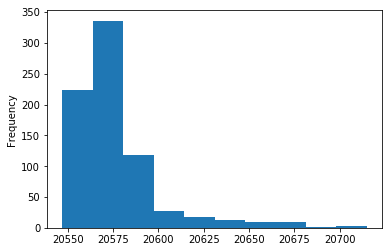

In [72]:
#df[['admnum','depdate']].groupby('depdate').count()
df['depdate'].plot.hist()

In [70]:
df['dtaddto'].unique()

array(['07202016', '10222016', '07052016', '10272016', '10072016',
       '10112016', '06302016', '07252016', '10252016', '07062016',
       '10052016', '10232016', '10132016', '07152016', '10142016',
       '07012016', '10262016', '07092016', '10292016', '10242016',
       '06112016', '10152016', '10032016', '07272016', '07042016',
       '10102016', '07212016', '07072016', '09302016', '10092016',
       '07132016', '06062016', '07122016', '10162016', '07222016', 'D/S',
       '07112016', '10212016', '10282016', '07262016', '07162016',
       '07282016', '07182016', '10022016', '06152016', '07022016',
       '07142016', '06292016', '10042016', '04082018', '05082016',
       '07172016', '10062016', '07242016', '10202016', '05232016',
       '10192016', '07232016', '07032016', '10182016', '10012016',
       '10122016', '10172016', '05272016', '07102016', '05172016',
       '05152016', '10082016', '07192016', '07082016', '06132016',
       '09012016', '05302016', '04202016', '05162016', 

In [75]:
f['i94bir'].unique()

array([61, 26, 76, 25, 51, 48, 33,  4, 72, 62, 34, 21, 46, 14, 41, 22, 64,
       17, 42, 35, 16, 40, 27, 56, 32,  8, 59, 38, 43, 10, 52, 19, 31, 58,
       66, 68, 44, 36, 12, 60, 18, 63, 50, 65, 29,  6, 73, 71, 39, 47, 37,
       54, 49, 28, 78, 55, 53, 69, 23, 80, 11, 75, 84, 45, 57, 67, 30,  1,
       77, 70,  5, 24, 15, 83, 20, 13, 81, 93,  3,  9, 87, 74, 85,  2])

In [77]:
test_df = df[['cicid','i94yr','biryear','i94bir']]
test_df['(i94yr-biryear)'] = test_df.i94yr - test_df.biryear 
test_df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cicid,i94yr,biryear,i94bir,(i94yr-biryear)
0,4084316,2016,1955,61,61
1,4422636,2016,1990,26,26
2,1195600,2016,1940,76,76
3,5291768,2016,1991,25,25
5,1481650,2016,1965,51,51


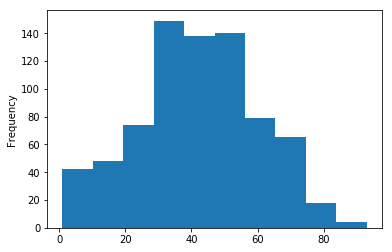

In [78]:
df.i94bir.plot.hist()

Immigration data has the following columns;

| Column | Data Type | Description |
|--------|-----------|-------------|
| i94yr   |  .         |     Year of arrival date        |
| i94mon  | . | Month of arrival date |
| i94cit  | . | |
| i94res  | . | | 
| i94port | . | Port of arrival |
| arrdate | . | Arrival date |
| i94mode | . | Mode of transportation(air, land, sea)| 
| i94addr | . | State of stay address|
| depdate | . | Departure date| 
| i94bir  | . | I-94 Age = i94yr-biryear|
| i94visa | . | I-94 Visa (1: Business, 2: Tourist, 3: Student)|
| count   | . | Number of person | 
| dtadfile| . | |
| visapost| . | |
| occup   | . | Occupation? |
| entdepa | . | |
| entdepd | . | |
| entdepu | . | |
| matflag | . | |
| biryear | . | Birth year|
| dtaddto | . | |
| gender  | . | Gender |
| insnum  | . | INS Number |
| airline | . | Airline Code |
| admnum  | . | ADM Number|
| fltno   | . | Flight Number|
| visatype| . | Visa Type|

In [53]:
print("%22s %6s %8s" % ('Column Name','NaN','Percentage'))
for c in df.columns:
    c_sum = df[c].isnull().sum()
    c_percentage = 100.0*c_sum/len(df)
    print("%22s %6d %8.2f" % (c,c_sum,c_percentage))

                Column    NaN        %
            Unnamed: 0      0     0.00
                 cicid      0     0.00
                 i94yr      0     0.00
                i94mon      0     0.00
                i94cit      0     0.00
                i94res      0     0.00
               i94port      0     0.00
               arrdate      0     0.00
               i94mode      0     0.00
               i94addr      0     0.00
               depdate      0     0.00
                i94bir      0     0.00
               i94visa      0     0.00
                 count      0     0.00
              dtadfile      0     0.00
               entdepa      0     0.00
               entdepd      0     0.00
               matflag      0     0.00
               biryear      0     0.00
               dtaddto      0     0.00
                gender      0     0.00
               airline      0     0.00
                admnum      0     0.00
                 fltno      0     0.00
              visatype   

Let's look at possible dimension tables

### Visitors

In [114]:
visitors_df = df[['cicid','biryear','gender','i94bir']]
visitors_df.head()

,cicid,biryear,gender,i94bir
0,4084316,1955,F,61
1,4422636,1990,M,26
2,1195600,1940,M,76
3,5291768,1991,M,25
5,1481650,1965,M,51


### Visits

In [100]:
i94_df = df[['cicid', 'i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port','i94mode', 'i94addr', 'i94bir','biryear', 'i94visa','visatype']]
i94_df.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,i94mode,i94addr,i94bir,biryear,i94visa,visatype
0,4084316,2016,4,209,209,HHW,1,HI,61,1955,2,WT
1,4422636,2016,4,582,582,MCA,1,TX,26,1990,2,B2
2,1195600,2016,4,148,112,OGG,1,FL,76,1940,2,WT
3,5291768,2016,4,297,297,LOS,1,CA,25,1991,2,B2
5,1481650,2016,4,577,577,ATL,1,GA,51,1965,2,B2


In [101]:
i94_df['i94mode'].unique()

array([1, 2])

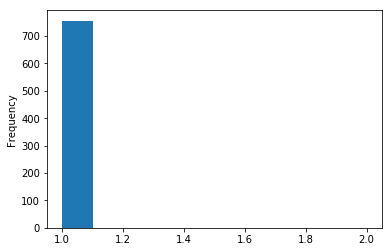

In [102]:
i94_df.i94mode.plot.hist()

In [113]:

print("Value_of_i94mode count")
for v in i94_df['i94mode'].unique():
    print(v,i94_df[ i94_df['i94mode'] == v]['cicid'].count())
    

Value_of_i94mode count
1 756
2 1


In [169]:
test_df = df[['cicid', 'i94addr']]
test_df = test_df.groupby('i94addr').count()
test_df.sort_values(by=['cicid'], ascending=False).head(5)

,cicid
i94addr,
FL,148
NY,139
CA,135
HI,44
NV,32


### Flights

In [105]:
df['airline'].unique()

array(['JL', '*GA', 'LH', 'QR', 'DL', 'CX', 'BA', 'QF', 'EK', 'AF', 'OZ',
       'DY', 'UA', 'VS', 'Y4', 'TK', 'AA', 'IB', 'TW', 'AR', 'CA', 'AM',
       'JJ', 'EI', 'NZ', 'CM', 'SU', 'FI', 'AV', 'WN', 'RS', 'KE', 'EV',
       'KL', 'NH', 'AD', 'CI', 'B6', 'BR', 'LX', 'SK', 'EQ', 'SQ', 'AZ',
       '7C', 'LA', '4M', 'SWQ', 'AB', 'NK', 'WK', 'SE', 'AI', 'PY', '4O',
       'HA', 'HU', 'TOM', 'LJ', 'LY', 'VES', 'CZ', 'BB', 'KU', 'MT', 'KX',
       'BW', 'MQ', 'NQ', 'MU', 'EY', 'TP', '9V', 'S3', 'UP', 'JQ', 'AY',
       '2D', 'CP', 'YX', 'PR', 'SV', 'VA', '5J', 'FJ', 'BX', 'UX', '3U',
       'RV', 'LO', 'TB', 'SN', 'WS', '9E', 'W3', 'OS', 'ARU', '7I', 'ZX'], dtype=object)

In [202]:
df[['cicid','airline']].groupby('airline').count().head(5)

,cicid
airline,
*GA,4
2D,2
3U,1
4M,2
4O,3


In [95]:
df['fltno'].unique()

array(['00782', 'XBLNG', '00464', '00739', '910', '870', '00117', '00015',
       '00598', '00215', '00338', '00554', '00143', '00204', '06750',
       '00273', '00872', '00075', '00930', '00033', '01498', '01428',
       '06253', '01085', '00311', '00428', '00196', '01304', '00819',
       '00078', '01504', '00017', '08094', '00139', '06165', '01300', '6',
       '00302', '00102', '00071', '00227', '00876', '00615', '00010',
       '00150', '00838', '00402', '00030', '02039', '02831', '00066',
       '00420', '00079', '07597', '00342', '00085', '00020', '00283',
       '00988', '00228', '08090', '00023', '00925', '00111', '00287',
       '00956', '00992', '00115', '00625', '05510', '00473', '00034',
       '00621', '01089', '00008', '00007', '08704', '00966', '01306',
       '00006', '00060', '00002', '00022', '00907', '00616', '00209',
       '00550', '00062', '00792', '00179', '00578', '982', '00057',
       '00608', '00787', '00016', '00731', '03106', '02514', '00128',
       '0068

In [182]:
# Drop duplicates and rows with NaN value
flights_df = df[df['i94mode']==1]
flights_df = flights_df[['airline','fltno','i94port','i94yr','i94mon']].drop_duplicates().dropna()
flights_df.head()

,airline,fltno,i94port,i94yr,i94mon
0,JL,00782,HHW,2016,4
1,*GA,XBLNG,MCA,2016,4
2,LH,00464,OGG,2016,4
3,QR,00739,LOS,2016,4
5,DL,910,ATL,2016,4


In [183]:
flights_df.count()

airline    597
fltno      597
i94port    597
i94yr      597
i94mon     597
dtype: int64

In [99]:
df.head()

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,...,entdepa,entdepd,matflag,biryear,dtaddto,gender,airline,admnum,fltno,visatype
0,2027561,4084316,2016,4,209,209,HHW,20566.0,1,HI,...,G,O,M,1955,07202016,F,JL,56582674633,00782,WT
1,2171295,4422636,2016,4,582,582,MCA,20567.0,1,TX,...,G,R,M,1990,10222016,M,*GA,94361995930,XBLNG,B2
2,589494,1195600,2016,4,148,112,OGG,20551.0,1,FL,...,G,O,M,1940,07052016,M,LH,55780468433,00464,WT
3,2631158,5291768,2016,4,297,297,LOS,20572.0,1,CA,...,G,O,M,1991,10272016,M,QR,94789696030,00739,B2
5,721257,1481650,2016,4,577,577,ATL,20552.0,1,GA,...,T,N,M,1965,10072016,M,DL,736852585,910,B2


### Airport Codes Data

In [185]:
airport_df = pd.read_csv('airport-codes_csv.csv')

In [186]:
airport_df.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


Let's look at the column names

In [187]:
airport_df.columns

Index(['ident', 'type', 'name', 'elevation_ft', 'continent', 'iso_country',
       'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code',
       'coordinates'],
      dtype='object')

Raw data has the following columns;

| Column             | Data Type | Description |
|--------------------|-----------|-------------|
| ident              | string    | Identifier        |
| type               | string    | Type of airport |
| name               | string    | Name of airport |
| elevation_ft       | float     | Elevation (in ft) |
| continent          | string    | Continent of airport |
| iso_country        | string    | Country of airport |
| iso_region         | string    | Region of airport |
| municipality       | string    | Municipality of airport |
| gps_code           | string    | GPS Code of airport |
| iata_code          | string    | IATA Code of airport |
| local_code         | string    | Local Code of airport |
| coordinates        | float, float | Coordinates of airport |

In [188]:
print("%22s %6s %8s" % ('Column Name','Count','Percentage'))
for c in airport_df.columns:
    c_sum = airport_df[c].isnull().sum()
    c_percentage = 100.0*c_sum/len(airport_df)
    print("%22s %6d %8.2f" % (c,c_sum,c_percentage))

                Column  Count Percentage
                 ident      0     0.00
                  type      0     0.00
                  name      0     0.00
          elevation_ft   7006    12.72
             continent  27719    50.33
           iso_country    247     0.45
            iso_region      0     0.00
          municipality   5676    10.31
              gps_code  14045    25.50
             iata_code  45886    83.32
            local_code  26389    47.91
           coordinates      0     0.00


The following columns can be dropped;
 - iata_code    (83.32%)
 - continent    (50.33%)
 - local_code   (47.91%)
 - gps_code     (25.50%)
 - elevation_ft (12.72%)

Drop a row that has NaN value for any of the following columns;
 - iso_country
 - municipality

In [189]:
airport_df = airport_df[['ident', 'type', 'name', 'iso_country','iso_region','municipality', 'coordinates']]
airport_df = airport_df.drop_duplicates().dropna()
airport_df.head()

,ident,type,name,iso_country,iso_region,municipality,coordinates
0,00A,heliport,Total Rf Heliport,US,US-PA,Bensalem,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,US,US-KS,Leoti,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,US,US-AK,Anchor Point,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,US,US-AL,Harvest,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,US,US-AR,Newport,"-91.254898, 35.6087"


In [190]:
print("%22s %6s %8s" % ('Column Name','Count','Percentage'))
for c in airport_df.columns:
    c_sum = airport_df[c].isnull().sum()
    c_percentage = 100.0*c_sum/len(airport_df)
    print("%22s %6d %8.2f" % (c,c_sum,c_percentage))

                Column    NaN        %
                 ident      0     0.00
                  type      0     0.00
                  name      0     0.00
           iso_country      0     0.00
            iso_region      0     0.00
          municipality      0     0.00
           coordinates      0     0.00


In [191]:
airport_df.count()

ident           49254
type            49254
name            49254
iso_country     49254
iso_region      49254
municipality    49254
coordinates     49254
dtype: int64

Select US airports

In [192]:
us_airport_df = airport_df[airport_df.iso_country == 'US'] 
#us_airport_df['iso_region'] = us_airport_df['iso_region'].apply(lambda x: x.replace('US-',''))
us_airport_df.head(5)

,ident,type,name,iso_country,iso_region,municipality,coordinates
0,00A,heliport,Total Rf Heliport,US,US-PA,Bensalem,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,US,US-KS,Leoti,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,US,US-AK,Anchor Point,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,US,US-AL,Harvest,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,US,US-AR,Newport,"-91.254898, 35.6087"


Let's remove 'US-' prefix from iso_region

In [193]:
us_airport_df_state = us_airport_df['iso_region'].apply(lambda x: x.replace('US-',''))
us_airport_df_state.head()

0    PA
1    KS
2    AK
3    AL
4    AR
Name: iso_region, dtype: object

In [194]:
print("There are %d US airports." % us_airport_df_state.count())

There are 22655 US airports.


In [195]:
us_airport_df = us_airport_df.drop(columns=['iso_region'])
us_airport_df = pd.concat([us_airport_df,us_airport_df_state], axis=1)
us_airport_df.head()

,ident,type,name,iso_country,municipality,coordinates,iso_region
0,00A,heliport,Total Rf Heliport,US,Bensalem,"-74.93360137939453, 40.07080078125",PA
1,00AA,small_airport,Aero B Ranch Airport,US,Leoti,"-101.473911, 38.704022",KS
2,00AK,small_airport,Lowell Field,US,Anchor Point,"-151.695999146, 59.94919968",AK
3,00AL,small_airport,Epps Airpark,US,Harvest,"-86.77030181884766, 34.86479949951172",AL
4,00AR,closed,Newport Hospital & Clinic Heliport,US,Newport,"-91.254898, 35.6087",AR


In [140]:
us_airport_df['coordinates'].apply(lambda x: x.split(',')).head()

0       [-74.93360137939453,  40.07080078125]
1                   [-101.473911,  38.704022]
2              [-151.695999146,  59.94919968]
3    [-86.77030181884766,  34.86479949951172]
4                      [-91.254898,  35.6087]
Name: coordinates, dtype: object

## US Cities Demographics

In [153]:
us_cities_df = pd.read_csv('us-cities-demographics.csv',sep=';')

In [154]:
us_cities_df.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


In [155]:
print("There are %d entries." % len(us_cities_df) )

There are 2891 entries.


Let's look at columns

In [156]:
us_cities_df.columns

Index(['City', 'State', 'Median Age', 'Male Population', 'Female Population',
       'Total Population', 'Number of Veterans', 'Foreign-born',
       'Average Household Size', 'State Code', 'Race', 'Count'],
      dtype='object')

In [157]:
print("%22s %6s %8s" % ('Column Name','Count','Percentage'))
for c in us_cities_df.columns:
    c_sum = us_cities_df[c].isnull().sum()
    c_percentage = 100.0*c_sum/len(us_cities_df)
    print("%22s %6d %8.2f" % (c,c_sum,c_percentage))

           Column Name  Count Percentage
                  City      0     0.00
                 State      0     0.00
            Median Age      0     0.00
       Male Population      3     0.10
     Female Population      3     0.10
      Total Population      0     0.00
    Number of Veterans     13     0.45
          Foreign-born     13     0.45
Average Household Size     16     0.55
            State Code      0     0.00
                  Race      0     0.00
                 Count      0     0.00


We can drop rows having NaN values while we still have at least more than 98% of data.

In [158]:
us_cities_df = us_cities_df.dropna()
us_cities_df.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


In [159]:
print("There are %d entries." % len(us_cities_df) )

There are 2875 entries.


Raw data has the following columns;

| Column             | Data Type | Description |
|--------------------|-----------|-------------|
| City               | string    | City        |
| State              | string    | State        |
| Median Age         | float   | Median Age |
| Male Population    | integer | Male Population |
| Female Population   | integer | Female Population |
| Total Population   | integer | Total Population |
| Number of Veterans | integer | Number of Veterans |
| Foreign-born       | integer | Number of foreign-born |
| Average Household Size | float | Average Household Size |
| State Code         | string  | State Code |
| Race               | string  | Race |
| Count              | integer | Count |

## Global Land Temperatures By City

In [7]:

fname = '../../data2/GlobalLandTemperaturesByCity.csv'
temp_df = pd.read_csv(fname)

In [8]:
temp_df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [12]:
check_NaN_Values_DF(temp_df,temp_df.columns)

           Column Name  Count Percentage
                    dt      0     0.00
    AverageTemperature 364130     4.23
AverageTemperatureUncertainty 364130     4.23
                  City      0     0.00
               Country      0     0.00
              Latitude      0     0.00
             Longitude      0     0.00
Number of total records is 8599212.



In [23]:
print("Number of rows both colums have NaN is %d\n" % len(temp_df[(temp_df.AverageTemperature == None) & (temp_df.AverageTemperatureUncertainty == None)]) )

Number of rows both colums have NaN is 0



It seems that it is safe to drop these rows instead of imputation. We will have at least 91% of data. 

In [24]:
temp_df = temp_df.dropna()
check_NaN_Values_DF(temp_df,temp_df.columns)

           Column Name  Count Percentage
                    dt      0     0.00
    AverageTemperature      0     0.00
AverageTemperatureUncertainty      0     0.00
                  City      0     0.00
               Country      0     0.00
              Latitude      0     0.00
             Longitude      0     0.00
Number of total records is 8235082.



In [2]:
	
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

output_data = './star/'

spark = SparkSession.builder.\
config("spark.jars.packages","saurfang:spark-sas7bdat:2.0.0-s_2.11")\
.enableHiveSupport().getOrCreate()
df_spark =spark.read.format('com.github.saurfang.sas.spark').load('../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat')


In [4]:
#write to parquet
#df_spark.write.mode("overwrite").parquet("sas_data_test")
#df_spark=spark.read.parquet("sas_data_test")

### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.

#### Cleaning Steps
Document steps necessary to clean the data

In [33]:
# Performing cleaning tasks here

def process_us_cities(df,output_data_path,output_data_name,output_data_mode):
    # Rename Columns to be consistent with documentation
    df_spark_us_cities = df.withColumnRenamed('Median Age','median_age')
    df_spark_us_cities = df_spark_us_cities.withColumnRenamed('City','city')
    df_spark_us_cities = df_spark_us_cities.withColumnRenamed('State','state')
    df_spark_us_cities = df_spark_us_cities.withColumnRenamed('Male Population','population_male')
    df_spark_us_cities = df_spark_us_cities.withColumnRenamed('Female Population','population_female')
    df_spark_us_cities = df_spark_us_cities.withColumnRenamed('Total Population','population_total')
    df_spark_us_cities = df_spark_us_cities.withColumnRenamed('Number of Veterans','veterans_cnt')
    df_spark_us_cities = df_spark_us_cities.withColumnRenamed('Foreign-born','foreign_born_cnt')
    df_spark_us_cities = df_spark_us_cities.withColumnRenamed('Average Household Size','ave_household_size')
    df_spark_us_cities = df_spark_us_cities.withColumnRenamed('State Code','state_code')

    # Select Columns since we do not need all
    df_spark_us_cities = df_spark_us_cities.select('state','state_code','city','population_total',\
                                               'population_male','population_female','veterans_cnt',\
                                               'foreign_born_cnt','ave_household_size')
    # Revise data type of columns - astype/cast
    df_spark_us_cities = df_spark_us_cities.withColumn('population_total',df_spark_us_cities['population_total'].cast('integer'))
    df_spark_us_cities = df_spark_us_cities.withColumn('population_female',df_spark_us_cities['population_female'].cast('integer'))
    df_spark_us_cities = df_spark_us_cities.withColumn('population_male',df_spark_us_cities['population_male'].cast('integer'))
    df_spark_us_cities = df_spark_us_cities.withColumn('veterans_cnt',df_spark_us_cities['veterans_cnt'].cast('integer'))
    df_spark_us_cities = df_spark_us_cities.withColumn('foreign_born_cnt',df_spark_us_cities['foreign_born_cnt'].cast('integer'))
    df_spark_us_cities = df_spark_us_cities.withColumn('ave_household_size',df_spark_us_cities['ave_household_size'].cast('float'))
    
    # Clean rows having NaN values
    df_spark_us_cities = df_spark_us_cities.dropna()

    # Write 
    df_spark_us_cities.write \
                .mode(output_data_mode) \
                .partitionBy("state") \
                .parquet(output_data_path + output_data_name)

    return df_spark_us_cities


df_spark_us_cities = spark.read.csv("./us-cities-demographics.csv", sep = ';', header = True)
df_spark_us_cities.printSchema()
df_spark_us_cities.show(5)
df_spark_us_cities = process_us_cities(df_spark_us_cities,output_data,'us_cities.parquet','overwrite')

# Log 
print('us_cities.parquet')
df_spark_us_cities.printSchema()
df_spark_us_cities.show(5)

root
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Median Age: string (nullable = true)
 |-- Male Population: string (nullable = true)
 |-- Female Population: string (nullable = true)
 |-- Total Population: string (nullable = true)
 |-- Number of Veterans: string (nullable = true)
 |-- Foreign-born: string (nullable = true)
 |-- Average Household Size: string (nullable = true)
 |-- State Code: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Count: string (nullable = true)

+----------------+-------------+----------+---------------+-----------------+----------------+------------------+------------+----------------------+----------+--------------------+-----+
|            City|        State|Median Age|Male Population|Female Population|Total Population|Number of Veterans|Foreign-born|Average Household Size|State Code|                Race|Count|
+----------------+-------------+----------+---------------+-----------------+----------------+--

In [34]:
# us_airports Table

def process_us_airports(df, output_data_path, output_data_name, output_data_mode):
    # Rename Columns
    df_spark_us_airports = df.withColumnRenamed('ident','id')
    df_spark_us_airports = df_spark_us_airports.withColumnRenamed('iso_region','iso_region_0')


    # Extract State Code from iso_region column, for US, prefixed with 'US-'
    df_spark_us_airports = df_spark_us_airports.withColumn('iso_region',regexp_replace('iso_region_0', "US-", ""))

    # Drop iso_region_0 column and clean rows having NaN value
    df_spark_us_airports = df_spark_us_airports.drop('iso_region_0').dropna()

    # Select Columns
    df_spark_us_airports = df_spark_us_airports.select('id','iso_country','iso_region','municipality',\
                                               'name','type','coordinates')
    # Write to dimension table
    df_spark_us_airports.write \
            .mode(output_data_mode) \
            .partitionBy('iso_country','iso_region','municipality') \
            .parquet(output_data_path + output_data_name)
    # Return 
    return df_spark_us_airports


# Load CSV file 
df_spark_us_airports = spark.read.csv("./airport-codes_csv.csv", sep = ',', header = True)
df_spark_us_airports.printSchema()
df_spark_us_airports.show(5)

# Select Airports in US
df_spark_us_airports = df_spark_us_airports.filter(df_spark_us_airports.iso_country=='US')

df_spark_us_airports = process_us_airports(df_spark_us_airports,output_data,'us_airports.parquet','overwrite')

# Log
print('us_airports.parquet')
df_spark_us_airports.printSchema()
df_spark_us_airports.show(5)


root
 |-- ident: string (nullable = true)
 |-- type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- elevation_ft: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- iso_country: string (nullable = true)
 |-- iso_region: string (nullable = true)
 |-- municipality: string (nullable = true)
 |-- gps_code: string (nullable = true)
 |-- iata_code: string (nullable = true)
 |-- local_code: string (nullable = true)
 |-- coordinates: string (nullable = true)

+-----+-------------+--------------------+------------+---------+-----------+----------+------------+--------+---------+----------+--------------------+
|ident|         type|                name|elevation_ft|continent|iso_country|iso_region|municipality|gps_code|iata_code|local_code|         coordinates|
+-----+-------------+--------------------+------------+---------+-----------+----------+------------+--------+---------+----------+--------------------+
|  00A|     heliport|   Total Rf Heliport|    

In [45]:
# flights Table

def process_us_flights(df, output_data_path, output_data_name, output_data_mode):
    # Select columns
    df_spark_flights = df.select('airline','fltno','i94port','i94yr','i94mon')

    df_spark_flights = df_spark_flights.withColumnRenamed('fltno','flight_no')
    df_spark_flights = df_spark_flights.withColumnRenamed('i94yr','date_yy')
    df_spark_flights = df_spark_flights.withColumnRenamed('i94mon','date_mm')
    df_spark_flights = df_spark_flights.withColumnRenamed('i94port','airport_code')
    df_spark_flights = df_spark_flights.withColumn('id', monotonically_increasing_id())
    
    # Revise data type of columns - astype/cast
    df_spark_flights = df_spark_flights.withColumn('date_yy',df_spark_flights['date_yy'].cast('integer'))
    df_spark_flights = df_spark_flights.withColumn('date_mm',df_spark_flights['date_mm'].cast('integer'))

    # Drop duplicate rows (distinct()) and rows having NaN value 
    df_spark_flights = df_spark_flights.dropDuplicates(['airline','flight_no','date_yy','date_mm','airport_code']).dropna()

    # Write to dimension table
    df_spark_flights.write.mode(output_data_mode) \
                    .partitionBy('date_yy','date_mm','airport_code','airline') \
                    .parquet(output_data_path + output_data_name)
    # return
    return df_spark_flights


# Select Inbound Air Arrivals
df_spark_flights = df_spark.filter(df_spark.i94mode==1).limit(1000)
df_spark_flights = process_us_flights(df_spark_flights, output_data, 'flights.parquet', "overwrite")
    
# Log
print('flights.parquet')
df_spark_flights.printSchema()
df_spark_flights.show(5)

flights.parquet
root
 |-- airline: string (nullable = true)
 |-- flight_no: string (nullable = true)
 |-- airport_code: string (nullable = true)
 |-- date_yy: integer (nullable = true)
 |-- date_mm: integer (nullable = true)
 |-- id: long (nullable = false)

+-------+---------+------------+-------+-------+---+
|airline|flight_no|airport_code|date_yy|date_mm| id|
+-------+---------+------------+-------+-------+---+
|     OS|       93|         WAS|   2016|      4|  1|
|     AA|    00199|         NYC|   2016|      4|  2|
|     AZ|    00602|         NYC|   2016|      4|  4|
|     AZ|    00608|         NYC|   2016|      4|  8|
|     TK|    00001|         NYC|   2016|      4|  9|
+-------+---------+------------+-------+-------+---+
only showing top 5 rows



In [29]:
# visitors table

def process_visitors(df,output_data_path, output_data_name, output_data_mode):
    # Select/project columns
    df_spark_visitors = df.select('cicid','biryear','gender','i94bir')

    df_spark_visitors = df_spark_visitors.withColumnRenamed('cicid','id')
    df_spark_visitors = df_spark_visitors.withColumnRenamed('biryear','dob_yy')
    df_spark_visitors = df_spark_visitors.withColumnRenamed('i94bir','age')

    # Revise data type of columns - astype/cast
    df_spark_visitors = df_spark_visitors.withColumn('id',df_spark_visitors['id'].cast('integer'))
    df_spark_visitors = df_spark_visitors.withColumn('dob_yy',df_spark_visitors['dob_yy'].cast('integer'))

    # Drop duplicate rows (distinct()) and rows having NaN value 
    df_spark_visitors = df_spark_visitors.distinct().dropna()

    # Write to dimension table
    df_spark_visitors.write \
                    .mode(output_data_mode) \
                    .partitionBy('dob_yy','gender') \
                    .parquet(output_data_path +  output_data_name)
    # Returns 
    return df_spark_visitors


# Select Visitors via Air Arrivals
df_spark_visitors = df_spark.filter(df_spark.i94mode==1)
df_spark_visitors = process_visitors(df_spark_visitors,output_data,'visitors.parquet','overwrite')

# Log
print('visitors.parquet')
df_spark_visitors.printSchema()
df_spark_visitors.show(5)

visitors.parquet
root
 |-- id: integer (nullable = true)
 |-- dob_yy: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)

+----+------+------+----+
|  id|dob_yy|gender| age|
+----+------+------+----+
| 898|  2003|     M|13.0|
| 927|  1968|     M|48.0|
|2406|  1989|     F|27.0|
|2520|  1940|     F|76.0|
|2600|  1973|     F|43.0|
+----+------+------+----+
only showing top 5 rows



In [26]:
# visits Table

# Select Visits via Air Arrivals
df_spark_visits = df_spark.filter(df_spark.i94mode==1)

# Select/project columns
df_spark_visits = df_spark_visits.select('cicid','i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port',\
                                         'i94addr', 'i94visa','visatype')

df_spark_visits = df_spark_visits.withColumnRenamed('cicid','id')
df_spark_visits = df_spark_visits.withColumnRenamed('i94yr','visit_yy')
df_spark_visits = df_spark_visits.withColumnRenamed('i94mon','visit_mm')
df_spark_visits = df_spark_visits.withColumnRenamed('i94cit','cit_code')
df_spark_visits = df_spark_visits.withColumnRenamed('i94res','res_code')
df_spark_visits = df_spark_visits.withColumnRenamed('i94port','port_code')
df_spark_visits = df_spark_visits.withColumnRenamed('i94addr','stay_state')
df_spark_visits = df_spark_visits.withColumnRenamed('i94visa','visa_kind')
df_spark_visits = df_spark_visits.withColumnRenamed('visatype','visa_type')

# Revise data type of columns - astype/cast
df_spark_visits = df_spark_visits.withColumn('id',df_spark_visits['id'].cast('integer'))
df_spark_visits = df_spark_visits.withColumn('visit_yy',df_spark_visits['visit_yy'].cast('integer'))
df_spark_visits = df_spark_visits.withColumn('visit_mm',df_spark_visits['visit_mm'].cast('integer'))
df_spark_visits = df_spark_visits.withColumn('cit_code',df_spark_visits['cit_code'].cast('integer'))
df_spark_visits = df_spark_visits.withColumn('res_code',df_spark_visits['res_code'].cast('integer'))
df_spark_visits = df_spark_visits.withColumn('visa_kind',df_spark_visits['visa_kind'].cast('integer'))

# (FK) visitor_id
df_spark_visits = df_spark_visits.withColumn('visitor_id',df_spark_visits['id'])

# (FK) flight_id

# (FK) stay_state

# Drop rows having NaN value in any column
df_spark_visits = df_spark_visits.dropna()

# Write to dimension table
df_spark_visits.write \
        .mode("overwrite") \
        .partitionBy('port_code','visit_yy','visit_mm') \
        .parquet(output_data + 'visits.parquet')

# Log
print('visits.parquet')
df_spark_visits.printSchema()
df_spark_visits.show(5)

visits.parquet
root
 |-- id: integer (nullable = true)
 |-- visit_yy: integer (nullable = true)
 |-- visit_mm: integer (nullable = true)
 |-- cit_code: integer (nullable = true)
 |-- res_code: integer (nullable = true)
 |-- port_code: string (nullable = true)
 |-- stay_state: string (nullable = true)
 |-- visa_kind: integer (nullable = true)
 |-- visa_type: string (nullable = true)
 |-- visitor_id: integer (nullable = true)

+---+--------+--------+--------+--------+---------+----------+---------+---------+----------+
| id|visit_yy|visit_mm|cit_code|res_code|port_code|stay_state|visa_kind|visa_type|visitor_id|
+---+--------+--------+--------+--------+---------+----------+---------+---------+----------+
|  7|    2016|       4|     254|     276|      ATL|        AL|        3|       F1|         7|
| 15|    2016|       4|     101|     101|      WAS|        MI|        2|       B2|        15|
| 16|    2016|       4|     101|     101|      NYC|        MA|        2|       B2|        16|
| 17|  

In [199]:
df_spark.head(5)

[Row(cicid=5748517.0, i94yr=2016.0, i94mon=4.0, i94cit=245.0, i94res=438.0, i94port='LOS', arrdate=20574.0, i94mode=1.0, i94addr='CA', depdate=20582.0, i94bir=40.0, i94visa=1.0, count=1.0, dtadfile='20160430', visapost='SYD', occup=None, entdepa='G', entdepd='O', entdepu=None, matflag='M', biryear=1976.0, dtaddto='10292016', gender='F', insnum=None, airline='QF', admnum=94953870030.0, fltno='00011', visatype='B1'),
 Row(cicid=5748518.0, i94yr=2016.0, i94mon=4.0, i94cit=245.0, i94res=438.0, i94port='LOS', arrdate=20574.0, i94mode=1.0, i94addr='NV', depdate=20591.0, i94bir=32.0, i94visa=1.0, count=1.0, dtadfile='20160430', visapost='SYD', occup=None, entdepa='G', entdepd='O', entdepu=None, matflag='M', biryear=1984.0, dtaddto='10292016', gender='F', insnum=None, airline='VA', admnum=94955622830.0, fltno='00007', visatype='B1'),
 Row(cicid=5748519.0, i94yr=2016.0, i94mon=4.0, i94cit=245.0, i94res=438.0, i94port='LOS', arrdate=20574.0, i94mode=1.0, i94addr='WA', depdate=20582.0, i94bir=29.

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
<i>Map out the conceptual data model and explain why you chose that model</i>


The proposed design uses [star schema](https://en.wikipedia.org/wiki/Star_schema) to support many different queries. The following [Parquet files](https://parquet.apache.org/) are for dimensional tables;

 - <b>us_cities.parquet</b> keeps track of US Cities and demographics.
 - <b>us_airports.parquet</b> keeps track of US Airports.
 - <b>flights.parquet</b> keeps track of flights.
 - <b>visitors.parquet</b> keeps track of visitors.

<i>us_cities.parquet</i> has the following columns;

| Column             | Data Type | Description |
|--------------------|-----------|-------------|
| state              | string    | State        |
| state_code         | string    | State Code |
| city               | string    | City        |
| population_total   | integer   | Total Population |
| population_male    | integer   | Male Population |
| population_female  | integer   | Female Population |
| veterans_cnt       | integer   | Number of Veterans |
| foreign_born_cnt   | integer   | Number of foreign-born |
| median_age         | float     | Median Age |
| ave_household_size | float     | Average Household Size |

<i>us_airports.parquet</i> has the following columns;

| Column             | Data Type | Description |
|--------------------|-----------|-------------|
| id                 | string    | Identifier        |
| iso_region         | string    | Region of airport |
| iso_country        | string    | Country of airport |
| municipality       | string    | Municipality of airport |
| name               | string    | Name of airport |
| type               | string    | Type of airport |
| coordinates        | float, float | Coordinates of airport |

<i>flights.parquet</i> has the following columns;

| Column       | Data Type | Description |
|--------------|-----------|-------------|
| airline      | string    | Airline Code | 
| flight_no     | string    | Flight Number |
| airport_code | string    | Airport Code |
| date_yy      | integer   | Year of Date of Flight |
| date_mm      | Integer   | Month of Data of Flight |

<i>visitors.parquet</i> has the following columns;

| Column | Data Type | Description |
|--------|-----------|-------------|
| id     | string    | Visitor Identifier           |
| dob_yy | integer   | Year of DOB |
| gender | string    | Gender |
| age    | integer   | Age at visit |

<i>visits.parquet</i> is a fact table and has the following columns;


| Column         | Data Type | Description |
|----------------|-----------|-------------|
| id             | integer   | Identifier        |
| visit_yy       | integer   |     Year of arrival date        |
| visit_mm       | integer   | Month of arrival date |
| cit_code       | integer   | |
| res_code       | string    | | 
| port_code      | string    | Port of arrival |
| transport_mode | string    | Mode of transportation(air, land, sea)| 
| visitor_id     | integer   | (FK) Visitor's identifier (=> visitors)|
| flight_id      | string    | (FK) Flight's identifier (=> flights)|
| addr_state     | string    | (FK) State of stay address (=> us_cities)|
| visa_kind      | integer   | I-94 Visa (1: Business, 2: Tourist, 3: Student)|
| visa_type      | string    | Visa Type|

#### 3.2 Mapping Out Data Pipelines
List the steps necessary to pipeline the data into the chosen data model

### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

In [203]:
# Write code here

# write us_cities.parquet

# write us_airports.parquet

# write flights.parquet

# write visitors.parquet

# write visits.parquet


#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the pipeline ran as expected. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

In [ ]:
# Perform quality checks here

#### 4.3 Data dictionary 
<i>
Create a data dictionary for your data model. 
For each field, provide a brief description of what the data is and where it came from. 
You can include the data dictionary in the notebook or in a separate file.</i>

Source and description of <i>us_cities.parquet</i> columns;

| Column             | Description            | Source                                        |
|--------------------|------------------------|-----------------------------------------------|
| state              | State                  | us-cities-demographics/State                  |
| state_code         | State Code             | us-cities-demographics/State Code             |
| city               | City                   | us-cities-demographics/City                   |
| population_total   | Total Population       | us-cities-demographics/Total Population       |
| population_male    | Male Population        | us-cities-demographics/Male Population        |
| population_female  | Female Population      | us-cities-demographics/Female Population      |
| veterans_cnt       | Number of Veterans     | us-cities-demographics/Number of Veterans     |
| foreign_born_cnt   | Number of foreign-born | us-cities-demographics/Foreign-born           |
| median_age         | Median Age             | us-cities-demographics/Median Age             |
| ave_household_size | Average Household Size | us-cities-demographics/Average Household Size |

Source and description of <i>us_airports.parquet</i> columns;

| Column       | Description             | Source                      |
|--------------|-------------------------|-----------------------------|
| id           | Identifier              | airport-codes/ident         |
| iso_region   | Region of airport       | airport-codes/iso_region    |
| iso_country  | Country of airport      | airport-codes/iso_country   |
| municipality | Municipality of airport | airport-codes/municipality  |
| name         | Name of airport         | airport-codes/name          |
| type         | Type of airport         | airport-codes/type          |
| coordinates  | Coordinates of airport  | airport-codes/coordinates   |

Source and description of <i>flights.parquet</i> columns;

| Column       | Description             | Source                  |
|--------------|-------------------------|-------------------------|
| airline      | Airline Code            | immigration_data/airline |
| flight_no    | Flight Number           | immigration_data/fltno   |
| airport_code | Airport Code            | immigration_data/i94port |
| date_yy      | Year of Date of Flight  | immigration_data/i94yr   |
| date_mm      | Month of Data of Flight | immigration_data/i94mon  |

Source and description of <i>visitors.parquet</i> columns;

| Column | Description        | Source |
|--------|--------------------|--------|
| id     | Visitor Identifier | immigration_data/cicid       |
| dob_yy | Year of DOB        | immigration_data/i94bir       |
| gender | Gender             | immigration_data/Gender       |
| age    | Age at visit       | immigration_data/biryear       |

Source and description of <i>visits.parquet</i> columns;


| Column         | Description                                    | Source |
|----------------|------------------------------------------------|-----------------------|
| id             | Identifier                                     | immigration_data/cicid |
| visit_yy       | Year of arrival date                           | immigration_data/i94yr     |
| visit_mm       | Month of arrival date                          | immigration_data/i94mon |
| cit_code       | .                                              | immigration_data/i94cit |
| res_code       | .                                              | immigration_data/i94res |
| port_code      | Port of arrival                                | immigration_data/i94port  |
| transport_mode | Mode of transportation(air, land, sea)         | immigration_data/i94mode  |
| visitor_id     | (FK) Visitor's identifier (=> visitors)        | visitors.parquet/id  |
| flight_id      | (FK) Flight's identifier (=> flights)          | flights.parquet/id  |
| addr_state     | (FK) State of stay address (=> us_cities)      | us_cities.parquet/id  |
| visa_kind      | I-94 Visa (1: Business, 2: Tourist, 3: Student)| immigration_data/i94visa  | 
| visa_type      | Visa Type                                      | immigration_data/visatype  |


#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
* Propose how often the data should be updated and why.
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
 * The database needed to be accessed by 100+ people.

## References
 1. https://travel.trade.gov/research/programs/i94/description.asp
 1. https://travel.trade.gov/research/programs/i94/methodology.asp